In [ ]:
pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from ipywidgets import VBox, Dropdown, Output
import streamlit as st
import altair as alt


In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/data science final project edyoda/Attendance_Data _Class_2.csv")
df1=pd.read_csv("/content/drive/MyDrive/data science final project edyoda/Attendance_Data_Class_1.csv")

In [ ]:
df1.head()
#EDA

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,02-01-21,R-02-01-21,01-01-21,R-01-01-21
0,1,WORKING,Missed,8,Missed,10,Missed,8,Missed,6,...,Missed,8,Missed,7,Missed,8,Missed,6,Missed,8
1,2,NaN,Missed,8,Missed,9,Missed,9,Attended,7,...,Attended,10,Attended,6,Missed,9,Attended,10,Missed,6
2,3,STUDENT,Missed,9,Missed,9,Missed,7,Missed,10,...,Attended,8,Missed,6,Missed,5,Attended,5,Attended,8
3,4,STUDENT,Missed,7,Missed,6,Attended,10,Missed,8,...,Missed,6,Attended,10,Attended,8,Attended,10,Attended,10
4,5,WORKING,Missed,10,Missed,5,Missed,7,Missed,6,...,Missed,7,Missed,6,Missed,5,Missed,5,Missed,10


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Student Roll Num  57 non-null     int64 
 1   Type              32 non-null     object
 2   10-01-21          57 non-null     object
 3   R-10-01-21        57 non-null     int64 
 4   09-01-21          57 non-null     object
 5   R-9-01-21         57 non-null     int64 
 6   08-01-21          57 non-null     object
 7   R-8-01-21         57 non-null     int64 
 8   07-01-21          56 non-null     object
 9   R-7-01-21         57 non-null     int64 
 10  06-01-21          56 non-null     object
 11  R-6-01-21         57 non-null     int64 
 12  05-01-21          56 non-null     object
 13  R-5-01-21         57 non-null     int64 
 14  04-01-21          56 non-null     object
 15  R-4-01-21         57 non-null     int64 
 16  03-01-21          56 non-null     object
 17  R-3-01-21         

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student Roll Num  70 non-null     int64  
 1   Type              30 non-null     object 
 2   10-01-21          70 non-null     object 
 3   R-10-01-21        70 non-null     int64  
 4   09-01-21          70 non-null     object 
 5   R-9-01-21         70 non-null     int64  
 6   08-01-21          70 non-null     object 
 7   R-8-01-21         70 non-null     int64  
 8   07-01-21          69 non-null     object 
 9   R-7-01-21         70 non-null     int64  
 10  06-01-21          69 non-null     object 
 11  R-6-01-21         70 non-null     int64  
 12  05-01-21          69 non-null     object 
 13  R-5-01-21         70 non-null     int64  
 14  04-01-21          69 non-null     object 
 15  R-4-01-21         70 non-null     int64  
 16  03-01-21          67 non-null     object 
 17 

In [ ]:
df2.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,06-01-21,R-6-01-21,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,01-01-21,R-01-01-21
0,1,NaN,Attended,10,Attended,8,Attended,5,Attended,7,Attended,8,Attended,10,Attended,10,Missed,6,NaN,NaN
1,2,NaN,Attended,7,Attended,9,Attended,6,Attended,10,Attended,9,Attended,10,Attended,8,Attended,6,NaN,NaN
2,3,STUDENT,Missed,8,Missed,5,Missed,5,Missed,8,Missed,9,Missed,7,Missed,7,Missed,6,NaN,NaN
3,4,NaN,Attended,8,Attended,5,Attended,9,Attended,5,Missed,8,Missed,10,Attended,10,Attended,6,NaN,NaN
4,5,WORKING,Attended,8,Attended,9,Attended,6,Missed,7,Missed,8,Missed,9,Missed,7,Missed,6,NaN,NaN


In [ ]:
print("Shape of Class1 data ",df1.shape)
print("Shape of class2 data",df2.shape)

Shape of Class1 data  (57, 22)
Shape of class2 data (70, 20)


In [ ]:
df1.isnull().sum()

Student Roll Num     0
Type                25
10-01-21             0
R-10-01-21           0
09-01-21             0
R-9-01-21            0
08-01-21             0
R-8-01-21            0
07-01-21             1
R-7-01-21            0
06-01-21             1
R-6-01-21            0
05-01-21             1
R-5-01-21            0
04-01-21             1
R-4-01-21            0
03-01-21             1
R-3-01-21            0
02-01-21             1
R-02-01-21           0
01-01-21             1
R-01-01-21           0
dtype: int64

In [ ]:
df2.isnull().sum()

Student Roll Num     0
Type                40
10-01-21             0
R-10-01-21           0
09-01-21             0
R-9-01-21            0
08-01-21             0
R-8-01-21            0
07-01-21             1
R-7-01-21            0
06-01-21             1
R-6-01-21            0
05-01-21             1
R-5-01-21            0
04-01-21             1
R-4-01-21            0
03-01-21             3
R-3-01-21            0
01-01-21            70
R-01-01-21          70
dtype: int64

In [ ]:
df1['Class'] = 'Class 1'
df2['Class'] = 'Class 2'
df1=pd.concat([df1,df2], ignore_index=True)
df1['Type'] = df1['Type'].fillna('STUDENT')
df1.drop(['01-01-21','R-01-01-21'],axis=1,inplace=True)

In [ ]:
df1.isnull().sum()

Student Roll Num     0
Type                 0
10-01-21             0
R-10-01-21           0
09-01-21             0
R-9-01-21            0
08-01-21             0
R-8-01-21            0
07-01-21             2
R-7-01-21            0
06-01-21             2
R-6-01-21            0
05-01-21             2
R-5-01-21            0
04-01-21             2
R-4-01-21            0
03-01-21             4
R-3-01-21            0
02-01-21            71
R-02-01-21          70
Class                0
dtype: int64

In [ ]:
#Filling null values with most frequent value
imputer = SimpleImputer(strategy='most_frequent')
df1 = pd.DataFrame(imputer.fit_transform(df1),columns = df1.columns)

In [ ]:
df1.head()

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,R-6-01-21,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,02-01-21,R-02-01-21,Class
0,1,WORKING,Missed,8,Missed,10,Missed,8,Missed,6,...,5,Missed,8,Missed,7,Missed,8,Missed,6.0,Class 1
1,2,STUDENT,Missed,8,Missed,9,Missed,9,Attended,7,...,7,Attended,10,Attended,6,Missed,9,Attended,10.0,Class 1
2,3,STUDENT,Missed,9,Missed,9,Missed,7,Missed,10,...,5,Attended,8,Missed,6,Missed,5,Attended,5.0,Class 1
3,4,STUDENT,Missed,7,Missed,6,Attended,10,Missed,8,...,7,Missed,6,Attended,10,Attended,8,Attended,10.0,Class 1
4,5,WORKING,Missed,10,Missed,5,Missed,7,Missed,6,...,9,Missed,7,Missed,6,Missed,5,Missed,5.0,Class 1


In [ ]:
df1.isnull().sum()

Student Roll Num    0
Type                0
10-01-21            0
R-10-01-21          0
09-01-21            0
R-9-01-21           0
08-01-21            0
R-8-01-21           0
07-01-21            0
R-7-01-21           0
06-01-21            0
R-6-01-21           0
05-01-21            0
R-5-01-21           0
04-01-21            0
R-4-01-21           0
03-01-21            0
R-3-01-21           0
02-01-21            0
R-02-01-21          0
Class               0
dtype: int64

In [ ]:
df1

,Student Roll Num,Type,10-01-21,R-10-01-21,09-01-21,R-9-01-21,08-01-21,R-8-01-21,07-01-21,R-7-01-21,...,R-6-01-21,05-01-21,R-5-01-21,04-01-21,R-4-01-21,03-01-21,R-3-01-21,02-01-21,R-02-01-21,Class
0,1,WORKING,Missed,8,Missed,10,Missed,8,Missed,6,...,5,Missed,8,Missed,7,Missed,8,Missed,6.0,Class 1
1,2,STUDENT,Missed,8,Missed,9,Missed,9,Attended,7,...,7,Attended,10,Attended,6,Missed,9,Attended,10.0,Class 1
2,3,STUDENT,Missed,9,Missed,9,Missed,7,Missed,10,...,5,Attended,8,Missed,6,Missed,5,Attended,5.0,Class 1
3,4,STUDENT,Missed,7,Missed,6,Attended,10,Missed,8,...,7,Missed,6,Attended,10,Attended,8,Attended,10.0,Class 1
4,5,WORKING,Missed,10,Missed,5,Missed,7,Missed,6,...,9,Missed,7,Missed,6,Missed,5,Missed,5.0,Class 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,66,IGNORE,Missed,8,Missed,6,Missed,7,Missed,6,...,10,Missed,6,Missed,9,Missed,8,Attended,5.0,Class 2
123,67,STUDENT,Missed,8,Missed,10,Missed,10,Missed,6,...,7,Missed,7,Missed,6,Missed,8,Attended,5.0,Class 2
124,68,STUDENT,Attended,9,Attended,5,Attended,5,Attended,10,...,9,Attended,9,Attended,9,Attended,10,Attended,5.0,Class 2
125,69,STUDENT,Attended,8,Attended,7,Attended,5,Attended,8,...,9,Attended,5,Attended,10,Attended,8,Attended,5.0,Class 2


In [ ]:

df1['Average_Satisfaction_Rating'] = df1.filter(like='R-').mean(axis=1)
df1['Missing_Sessions'] = df1.apply(lambda row: row.str.count('Missed').sum(), axis=1)
df1['Attended_Sessions'] = df1.apply(lambda row: row.str.count('Attended').sum(), axis=1)
df1['Total_Sessions'] = df1['Missing_Sessions'] + df1['Attended_Sessions']
df1['Attendance_Percentage'] = round((df1['Attended_Sessions'] / df1['Total_Sessions']) * 100, 2)


In [ ]:
low_attendance = df1[df1['Attendance_Percentage'] < 80][['Student Roll Num', 'Attendance_Percentage','Class']].reset_index(drop=True)
print("Students with low attendance:\n", low_attendance)

Students with low attendance:
    Student Roll Num  Attendance_Percentage    Class
0                 1                   0.00  Class 1
1                 2                  44.44  Class 1
2                 3                  33.33  Class 1
3                 4                  44.44  Class 1
4                 5                   0.00  Class 1
..              ...                    ...      ...
69               60                  11.11  Class 2
70               63                  66.67  Class 2
71               64                  77.78  Class 2
72               66                  11.11  Class 2
73               67                  11.11  Class 2

[74 rows x 3 columns]


In [ ]:
low_satisfaction = df1[df1['Average_Satisfaction_Rating'] < 7][['Student Roll Num', 'Average_Satisfaction_Rating','Class']].reset_index(drop=True)
print("Students with low satisfaction:\n", low_satisfaction)

Students with low satisfaction:
    Student Roll Num  Average_Satisfaction_Rating    Class
0                 5                     6.666667  Class 1
1                15                     6.777778  Class 1
2                17                     6.666667  Class 1
3                18                     6.666667  Class 1
4                19                     6.777778  Class 1
5                31                     6.555556  Class 1
6                37                     6.666667  Class 1
7                39                     6.333333  Class 1
8                 3                     6.666667  Class 2
9                 6                     6.444444  Class 2
10               11                     6.888889  Class 2
11               16                     6.888889  Class 2
12               19                     6.555556  Class 2
13               23                     6.444444  Class 2
14               26                     6.888889  Class 2
15               27                    

In [ ]:
high_satisfaction = df1[df1['Average_Satisfaction_Rating'] > 8][['Student Roll Num', 'Average_Satisfaction_Rating']].reset_index(drop=True)
print("Students with high satisfaction:\n", high_satisfaction)


Students with high satisfaction:
    Student Roll Num  Average_Satisfaction_Rating
0                 2                     8.333333
1                 7                     8.111111
2                13                     8.555556
3                16                     8.333333
4                25                     8.333333
5                29                     8.111111
6                32                     8.555556
7                36                     8.444444
8                43                     8.555556
9                51                     8.111111
10               14                     8.666667
11               15                     8.444444
12               25                     8.111111
13               39                     8.444444
14               60                     8.333333


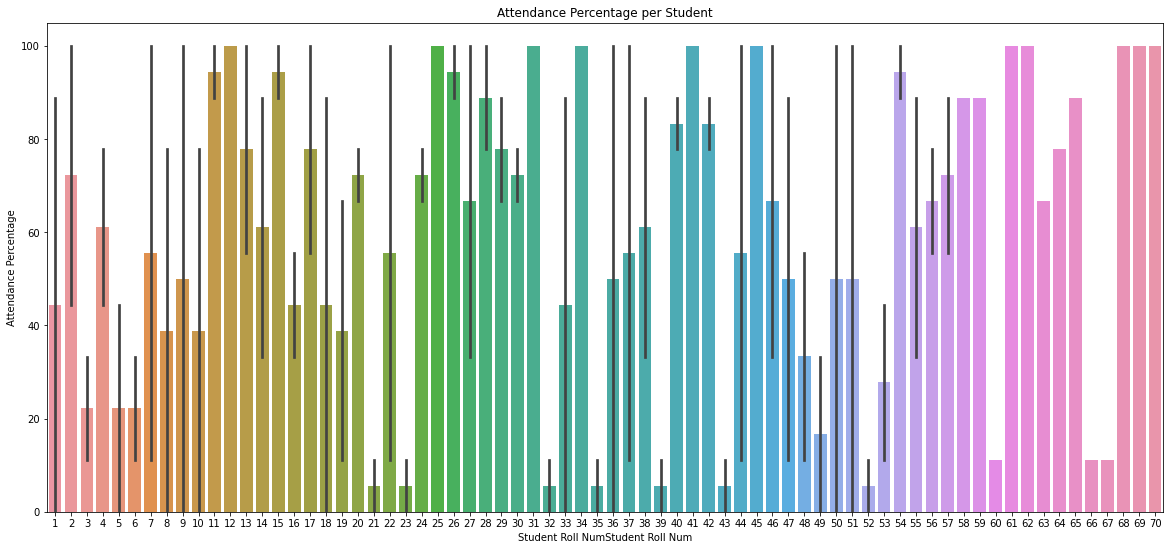

In [ ]:
#Visualisation
#bar plot of attendance percentage for each student
plt.figure(figsize=(20, 9))
sns.barplot(x='Student Roll Num', y='Attendance_Percentage', data=df1)
plt.title('Attendance Percentage per Student')
plt.xlabel('Student Roll NumStudent Roll Num')
plt.ylabel('Attendance Percentage')
plt.show()


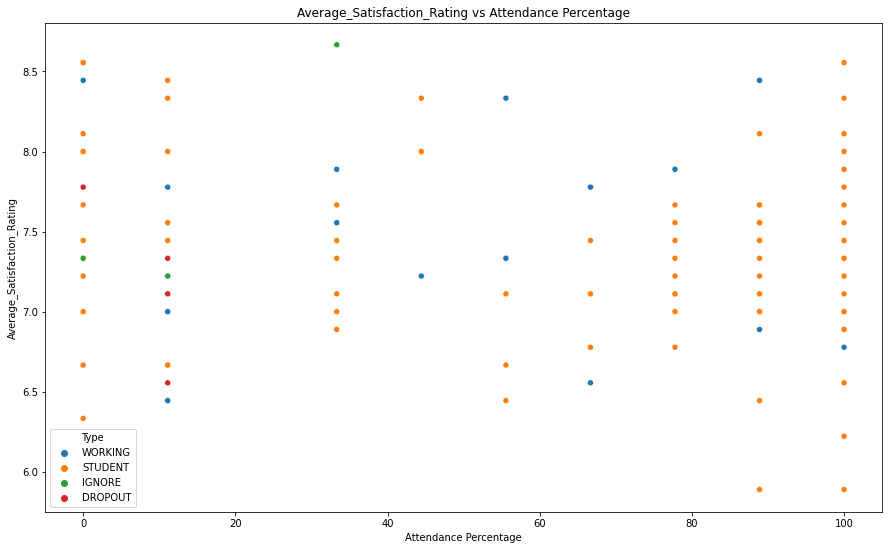

In [ ]:
#scatter plot of Average_Satisfaction_Rating vs attendance percentage for each student
plt.figure(figsize=(15, 9))
sns.scatterplot(x='Attendance_Percentage', y='Average_Satisfaction_Rating', data=df1, hue='Type')
plt.title('Average_Satisfaction_Rating vs Attendance Percentage')
plt.xlabel('Attendance Percentage')
plt.ylabel('Average_Satisfaction_Rating')
plt.show()

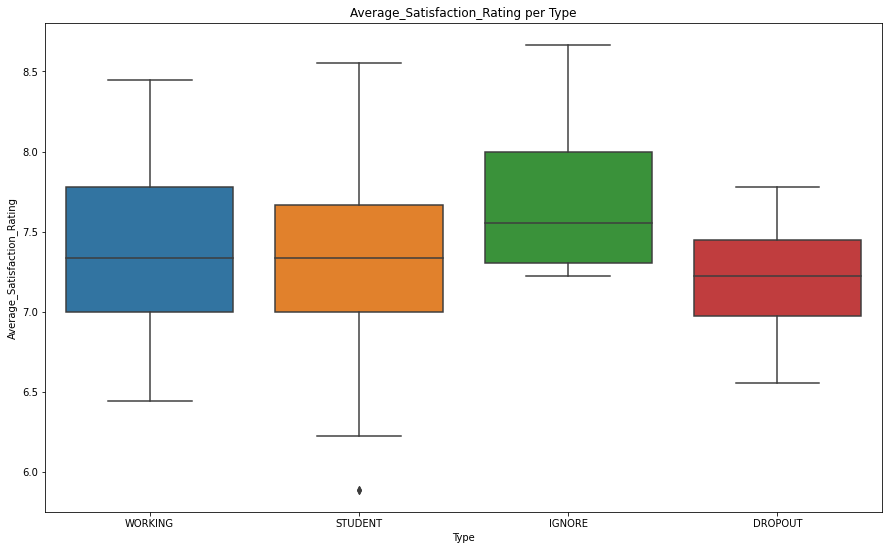

In [ ]:
#box plot of Average_Satisfaction_Rating for each student
plt.figure(figsize=(15, 9))
sns.boxplot(x='Type', y='Average_Satisfaction_Rating', data=df1)
plt.title('Average_Satisfaction_Rating per Type')
plt.xlabel('Type')
plt.ylabel('Average_Satisfaction_Rating')
plt.show()

In [ ]:
print(df1.columns)

Index(['Student Roll Num', 'Type', '10-01-21', 'R-10-01-21', '09-01-21',
       'R-9-01-21', '08-01-21', 'R-8-01-21', '07-01-21', 'R-7-01-21',
       '06-01-21', 'R-6-01-21', '05-01-21', 'R-5-01-21', '04-01-21',
       'R-4-01-21', '03-01-21', 'R-3-01-21', '02-01-21', 'R-02-01-21', 'Class',
       'Average_Satisfaction_Rating', 'Missing_Sessions', 'Attended_Sessions',
       'Total_Sessions', 'Attendance_Percentage'],
      dtype='object')


In [ ]:
import pandas as pd
import plotly.express as px
from ipywidgets import VBox, Dropdown, Output

# load sample data
df = df1
class_options = ["All"] + df["Class"].unique().tolist()
type_options = ["All"] + df["Type"].unique().tolist()
satisfaction_options = ["All", "Satisfied", "Unsatisfied"]
attendance_options = ["All", ">50%", "<50%"]

# create initial scatter plot with all data
fig =px.scatter(df, x='Attendance_Percentage', y='Average_Satisfaction_Rating', color='Type', hover_name='Student Roll Num', title='Attendance vs Satisfaction')


# create output widget for dashboard
out = Output()

# create dropdown menus
class_dropdown = Dropdown(options=class_options, description='Class:')
type_dropdown = Dropdown(options=type_options, description='Type:')
satisfaction_dropdown = Dropdown(options=satisfaction_options, description='Satisfaction:')
attendance_dropdown = Dropdown(options=attendance_options, description='Attendance:')

# define function to filter data based on dropdown menu selections
def update_dashboard(change):
    with out:
        out.clear_output()
        filtered_df = df.copy()
        if class_dropdown.value != "All":
            filtered_df = filtered_df[filtered_df["Class"] == class_dropdown.value]
        if type_dropdown.value != "All":
            filtered_df = filtered_df[filtered_df["Type"] == type_dropdown.value]
        if satisfaction_dropdown.value != "All":
            if satisfaction_dropdown.value == "Satisfied":
                filtered_df = filtered_df[filtered_df["Average_Satisfaction_Rating"] >= 8.0]
            elif satisfaction_dropdown.value == "Unsatisfied":
                filtered_df = filtered_df[filtered_df["Average_Satisfaction_Rating"] < 7.0]
        if attendance_dropdown.value != "All":
            if attendance_dropdown.value == ">50%":
                filtered_df = filtered_df[filtered_df["Attendance_Percentage"] > 50]
            elif attendance_dropdown.value == "<50%":
                filtered_df = filtered_df[filtered_df["Attendance_Percentage"] < 50]
        if not filtered_df.empty:
            updated_fig = px.scatter(filtered_df, x="Student Roll Num", y="Attendance_Percentage", color="Average_Satisfaction_Rating", 
                                     hover_name="Student Roll Num", opacity=0.7)
            updated_fig.update_layout(margin=dict(l=0, r=0, t=30, b=0))
            updated_fig.show()
        else:
            print("No data to display for selected filters.")

# attach function to dropdown menu events
class_dropdown.observe(update_dashboard, names='value')
type_dropdown.observe(update_dashboard, names='value')
satisfaction_dropdown.observe(update_dashboard, names='value')
attendance_dropdown.observe(update_dashboard, names='value')

# create the dashboard with the scatter plot and the dropdown menus
dashboard = VBox([class_dropdown, type_dropdown, satisfaction_dropdown, attendance_dropdown, out])
display(dashboard)


In [ ]:

df = df1
class_options = ["All"] + df["Class"].unique().tolist()
type_options = ["All"] + df["Type"].unique().tolist()
satisfaction_options = ["All", "Satisfied", "Unsatisfied"]
attendance_options = ["All", ">50%", "<50%"]

# create initial scatter plot with all data
fig = px.scatter(df, x='Attendance_Percentage', y='Average_Satisfaction_Rating', color='Type', hover_name='Student Roll Num', title='Attendance vs Satisfaction')

# create output widget for dashboard
out = Output()

# create dropdown menus
class_dropdown = Dropdown(options=class_options, description='Class:')
type_dropdown = Dropdown(options=type_options, description='Type:')
satisfaction_dropdown = Dropdown(options=satisfaction_options, description='Satisfaction:')
attendance_dropdown = Dropdown(options=attendance_options, description='Attendance:')

# define function to filter data based on dropdown menu selections

import streamlit as st

# function to create dashboard
def create_dashboard(df):
    # filter dataframe
    filtered_df = df[df['Missing_Sessions'] > 0]
    
    # calculate missing sessions by type
    missing_sessions_by_type = filtered_df.groupby(['Type'])['Missing_Sessions'].sum().reset_index()
    missing_sessions_pie = alt.Chart(missing_sessions_by_type).mark_bar().encode(
        x='Missing_Sessions',
        y=alt.Y('Type', sort='-x')
    ).properties(
        title='Proportion of Missing Sessions by Type',
        width=500, height=300
    )
    
    # create table to show summary statistics
    satisfaction_summary = filtered_df.agg({'Average_Satisfaction_Rating': ['mean', 'median', 'min', 'max']})
    satisfaction_summary = satisfaction_summary.rename(index={'mean': 'Mean', 'median': 'Median', 'min': 'Minimum', 'max': 'Maximum'})
    
    # create dashboard
    st.title('Missing Sessions Dashboard')
    st.sidebar.title('Dashboard Options')
    
    # create dropdown menu to select a chart
    chart_choice = st.sidebar.selectbox(
        'Choose a chart',
        ['Proportion of Missing Sessions by Type', 'Summary Statistics of Average Satisfaction Rating']
    )
    
    # display chart based on dropdown menu selection
    if chart_choice == 'Proportion of Missing Sessions by Type':
        st.write('## Proportion of Missing Sessions by Type')
        st.altair_chart(missing_sessions_pie)
    elif chart_choice == 'Summary Statistics of Average Satisfaction Rating':
        st.write('## Summary Statistics of Average Satisfaction Rating')
        st.table(satisfaction_summary)



def update_dashboard(change):
    with out:
        out.clear_output()
        filtered_df = df.copy()
        if class_dropdown.value != "All":
            filtered_df = filtered_df[filtered_df["Class"] == class_dropdown.value]
        if type_dropdown.value != "All":
            filtered_df = filtered_df[filtered_df["Type"] == type_dropdown.value]
        if satisfaction_dropdown.value != "All":
            if satisfaction_dropdown.value == "Satisfied":
                filtered_df = filtered_df[filtered_df["Average_Satisfaction_Rating"] >= 8.0]
            elif satisfaction_dropdown.value == "Unsatisfied":
                filtered_df = filtered_df[filtered_df["Average_Satisfaction_Rating"] < 7.0]
        if attendance_dropdown.value != "All":
            if attendance_dropdown.value == ">50%":
                filtered_df = filtered_df[filtered_df["Attendance_Percentage"] > 50]
            elif attendance_dropdown.value == "<50%":
                filtered_df = filtered_df[filtered_df["Attendance_Percentage"] < 50]
        if not filtered_df.empty:
            # create scatter plot to show attendance vs satisfaction
            updated_fig = px.scatter(filtered_df, x="Attendance_Percentage", y="Average_Satisfaction_Rating", color="Type", 
                                     hover_name="Student Roll Num", opacity=0.7)
            updated_fig.update_layout(margin=dict(l=0, r=0, t=30, b=0))
            updated_fig.show()

            # create bar chart to show attendance percentage by type
            attendance_by_type = filtered_df.groupby(['Type'])['Attendance_Percentage'].mean().reset_index()
            attendance_bar = go.Figure(data=[go.Bar(x=attendance_by_type['Type'], y=attendance_by_type['Attendance_Percentage'], text=attendance_by_type['Attendance_Percentage'], textposition='auto')])
            attendance_bar.update_layout(title='Attendance Percentage by Type', xaxis_title='Type', yaxis_title='Attendance Percentage')
            attendance_bar.show()

            # create pie chart to show missing sessions by type
            missing_sessions_by_type = filtered_df.groupby(['Type'])['Missing_Sessions'].sum().reset_index()
            missing_sessions_pie = go.Figure(data=[go.Pie(labels=missing_sessions_by_type['Type'], values=missing_sessions_by_type['Missing_Sessions'], hole=.3)])
            missing_sessions_pie.update_layout(title='Missing Sessions by Type')
            missing_sessions_pie.show()

            # create table to show summary statistics
            satisfaction_summary = filtered_df.agg({'Average_Satisfaction_Rating': ['count', 'mean', 'std', 'min', 'max']}).reset_index()
            satisfaction_summary.columns = ['Statistic', 'Value']

            # display summary statistics
            st.write('## Summary Statistics for Average Satisfaction Rating')
            st.table(satisfaction_summary)

            scatter_df = filtered_df.groupby(['Num_Sessions']).mean().reset_index()
            scatter_chart = alt.Chart(scatter_df).mark_circle().encode(x='Num_Sessions',y='Average_Satisfaction_Rating',size='Missing_Sessions',color='Type').properties(width=700,height=500,title='Relationship between Average Satisfaction Rating, Number of Sessions, and Missing Sessions by Type')
            st.write('## Relationship between Average Satisfaction Rating, Number of Sessions, and Missing Sessions by Type')
            st.altair_chart(scatter_chart)

            # create bar chart to show total number of missing sessions by type
            missing_sessions_bar = alt.Chart(filtered_df).mark_bar().encode(x='Type',y='Missing_Sessions',color='Type').properties(width=700,height=500,title='Total Number of Missing Sessions by Type')
            st.write('## Total Number of Missing Sessions by Type')
            st.altair_chart(missing_sessions_bar)

            # create pie chart to show proportion of missing sessions by type
            missing_sessions_by_type = filtered_df.groupby(['Type'])['Missing_Sessions'].sum().reset_index()
            missing_sessions_pie = alt.Chart(missing_sessions_by_type).mark_circle().encode(values='Missing_Sessions',color='Type',tooltip=['Type', 'Missing_Sessions']).properties(width=700,height=500,title='Proportion of Missing Sessions by Type')

            st.write('## Proportion of Missing Sessions by Type')
            st.altair_chart(missing_sessions_pie)


In [ ]:
# create dashboard
create_dashboard(df)

In [ ]:
# attach function to dropdown menu events
class_dropdown.observe(update_dashboard, names='value')
type_dropdown.observe(update_dashboard, names='value')
satisfaction_dropdown.observe(update_dashboard, names='value')
attendance_dropdown.observe(update_dashboard, names='value')

In [ ]:
dashboard = VBox([class_dropdown, type_dropdown, satisfaction_dropdown, attendance_dropdown, out])
display(dashboard)
